<center>
<img src="img/colorido-horizontal-ufc.png" alt="Drawing" style="width: 500px;"/>
</center>

# Tópicos em Física Estatística Computacional

## Aula 04: Movimento Aleatório - Random Walk

Prof. Saulo Reis (Depto. de Física - UFC)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm  # Importar para calcular a gaussiana

### Random Walk em 1D

In [2]:
class RandomWalk1D:
    def __init__(self, steps, step_size=1):
        """
        Inicializa uma simulação de caminhada aleatória em 1D.

        Parâmetros:
            steps (int): Número de passos na caminhada aleatória.
            step_size (float): Tamanho de cada passo.
        """
        self.steps = steps
        self.step_size = step_size
        self.positions = [0]  # Inicia na origem

    def simulate(self):
        """
        Simula a caminhada aleatória em 1D.
        """
        moves = np.random.choice([-1, 1], size=self.steps) * self.step_size
        self.positions = np.cumsum(np.insert(moves, 0, 0))  # Soma cumulativa

    def get_positions(self):
        """
        Obtém as posições da caminhada aleatória.

        Retorna:
            list: Posições em cada passo da caminhada.
        """
        return self.positions

# Função para análise estatística
def analyze_random_walks(num_walks, steps, step_size=1):
    """
    Realiza análise estatística de múltiplas caminhadas aleatórias em 1D.

    Parâmetros:
        num_walks (int): Número de caminhadas aleatórias a simular.
        steps (int): Número de passos em cada caminhada.
        step_size (float): Tamanho de cada passo.

    Retorna:
        tuple: (posições médias, desvio padrão, todas as posições finais)
    """
    final_positions = []
    all_walks = []

    for _ in range(num_walks):
        rw = RandomWalk1D(steps, step_size)
        rw.simulate()
        final_positions.append(rw.get_positions()[-1])
        all_walks.append(rw.get_positions())

    avg_positions = np.mean(all_walks, axis=0)
    std_deviation = np.std(all_walks, axis=0)

    return avg_positions, std_deviation, final_positions

In [28]:
num_walks = 10000
steps = 500
step_size = 1  # Tamanho do passo definido pelo usuário

avg, std, final_positions = analyze_random_walks(num_walks, steps, step_size)

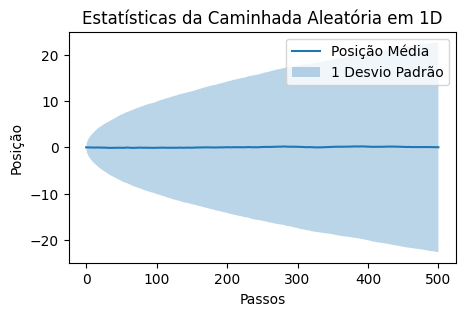

In [29]:
# Plotar média e desvio padrão
plt.figure(figsize=(5,3))
plt.plot(avg, label="Posição Média")
plt.fill_between(range(steps + 1), avg - std, avg + std, alpha=0.3, label="1 Desvio Padrão")
plt.title("Estatísticas da Caminhada Aleatória em 1D")
plt.xlabel("Passos")
plt.ylabel("Posição")
plt.legend()
plt.show()

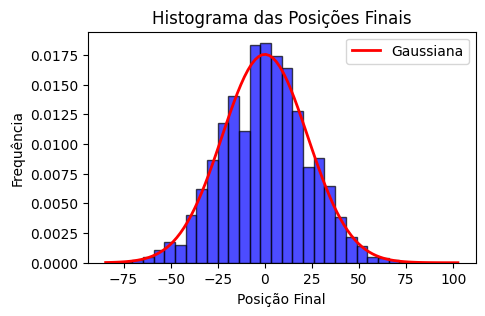

In [30]:
# Plotar histograma das posições finais
plt.figure(figsize=(5,3))
plt.hist(final_positions, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histograma das Posições Finais")
plt.xlabel("Posição Final")
plt.ylabel("Frequência")

# Calcular média e desvio padrão dos dados
mu, sigma = np.mean(final_positions), np.std(final_positions)

# Gerar pontos para a curva gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Plotar a curva gaussiana
plt.plot(x, p, 'r', linewidth=2, label='Gaussiana')

plt.legend()
plt.show()

### Random Walk in $N$D

In [35]:
# Classe para caminhada aleatória em 2D utilizando RandomWalk1D
class RandomWalk2D:
    def __init__(self, steps, step_size=1):
        """
        Inicializa uma simulação de caminhada aleatória em 2D usando RandomWalk1D.

        Parâmetros:
            steps (int): Número de passos na caminhada aleatória.
            step_size (float): Tamanho de cada passo.
        """
        self.steps = steps
        self.step_size = step_size
        # Cria duas instâncias de RandomWalk1D para x e y
        self.walk_x = RandomWalk1D(steps, step_size)
        self.walk_y = RandomWalk1D(steps, step_size)
        self.positions = None  # Será preenchido após a simulação

    def simulate(self):
        """
        Simula a caminhada aleatória em 2D.
        """
        # Simula as caminhadas em x e y
        self.walk_x.simulate()
        self.walk_y.simulate()
        x_positions = self.walk_x.get_positions()
        y_positions = self.walk_y.get_positions()
        # Combina as posições de x e y em um array de coordenadas
        self.positions = np.column_stack((x_positions, y_positions))

    def get_positions(self):
        """
        Obtém as posições da caminhada aleatória em 2D.

        Retorna:
            numpy.ndarray: Posições em cada passo da caminhada (formato: (steps+1, 2)).
        """
        return self.positions

# Função para análise estatística em 2D
def analyze_random_walks_2d(num_walks, steps, step_size=1):
    """
    Realiza análise estatística de múltiplas caminhadas aleatórias em 2D.

    Parâmetros:
        num_walks (int): Número de caminhadas aleatórias a simular.
        steps (int): Número de passos em cada caminhada.
        step_size (float): Tamanho de cada passo.

    Retorna:
        tuple: (mean_x, mean_y, var_x, var_y)
    """
    final_positions_x = []
    final_positions_y = []

    for _ in range(num_walks):
        rw = RandomWalk2D(steps, step_size)
        rw.simulate()
        positions = rw.get_positions()
        final_positions_x.append(positions[-1, 0])
        final_positions_y.append(positions[-1, 1])

    mean_x = np.mean(final_positions_x)
    mean_y = np.mean(final_positions_y)
    var_x = np.var(final_positions_x)
    var_y = np.var(final_positions_y)

    return mean_x, mean_y, var_x, var_y

In [36]:
num_walks = 1000
steps = 500
step_size = 1  # Tamanho de cada passo

mean_x, mean_y, var_x, var_y = analyze_random_walks_2d(num_walks, steps, step_size)

print(f"Valor médio das posições x: {mean_x}")
print(f"Valor médio das posições y: {mean_y}")
print(f"Variância das posições x: {var_x}")
print(f"Variância das posições y: {var_y}")

Valor médio das posições x: -0.346
Valor médio das posições y: 0.26
Variância das posições x: 512.468284
Variância das posições y: 498.34839999999997


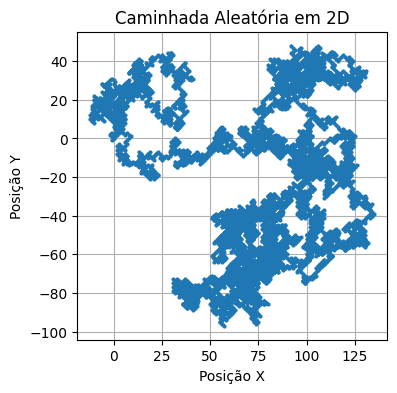

In [40]:
steps = 10000
step_size = 1  # Tamanho de cada passo

rw = RandomWalk2D(steps, step_size)
rw.simulate()
positions = rw.get_positions()

plt.figure(figsize=(4, 4))
plt.plot(positions[:, 0], positions[:, 1], marker='o', markersize=2)
plt.title("Caminhada Aleatória em 2D")
plt.xlabel("Posição X")
plt.ylabel("Posição Y")
plt.grid(True)
plt.axis('equal')
plt.show()

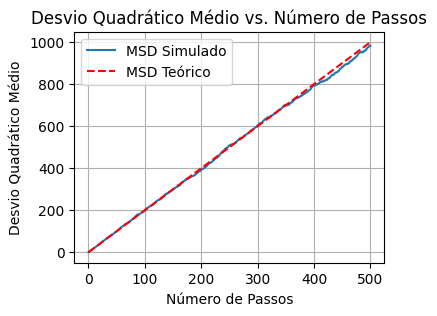

In [42]:
theoretical_msd = 2 * (step_size**2) * np.arange(steps + 1)
plt.figure(figsize=(4, 3))
plt.plot(range(steps + 1), msd, label='MSD Simulado')
plt.plot(range(steps + 1), theoretical_msd, 'r--', label='MSD Teórico')
plt.title("Desvio Quadrático Médio vs. Número de Passos")
plt.xlabel("Número de Passos")
plt.ylabel("Desvio Quadrático Médio")
plt.legend()
plt.grid(True)
plt.show()